In [1]:
#The imports required for the whole project
import pandas as pd
import numpy as np
import os
import openpyxl 
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

C:\Users\chris\AppData\Local\Temp\ipykernel_24560\627685350.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
#The function changes the excel file to dataframe

def excel_to_df(excel_file: str, sheet_name: str = None) -> pd.DataFrame:

    df = pd.read_excel(excel_file, sheet_name=sheet_name)
    
    df.columns = (
        df.columns
        .str.lower()
        .str.strip()
        .str.replace(" ", "_")
        .str.replace(r"[^0-9a-zA-Z_]", "", regex=True)
    )
    
    df = df.convert_dtypes()
    
    return df

In [3]:
#Using the function to transform the actual excel into a df called xl_df
xl_df = excel_to_df("MEHOINUSA672N.xlsx", sheet_name="Annual")

xl_df.head()

,observation_date,mehoinusa672n
0,1984-01-01,60420
1,1985-01-01,61570
2,1986-01-01,63850
3,1987-01-01,64650
4,1988-01-01,65130


In [4]:
#Using pandas built in functions to transform a csv to a df called csv_df
csv_df = pd.read_csv("Real_Estate_Sales_2001-2023_GL.csv", encoding="utf-8")
csv_df.head(3)

C:\Users\chris\AppData\Local\Temp\ipykernel_24560\2051857402.py:2: DtypeWarning: Columns (7,8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  csv_df = pd.read_csv("Real_Estate_Sales_2001-2023_GL.csv", encoding="utf-8")


,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020177,2020,04/14/2021,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Residential,Single Family,NaN,NaN,NaN,POINT (-73.06822 41.35014)
1,2020225,2020,05/26/2021,Ansonia,152 JACKSON ST,110500.0,239900.0,0.4606,Residential,Three Family,NaN,NaN,NaN,NaN
2,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.463,Commercial,NaN,NaN,NaN,NaN,NaN


In [5]:
#Checking all columns titles
xl_df.columns

Index(['observation_date', 'mehoinusa672n'], dtype='object')

In [6]:
#Checking all columns titles
csv_df.columns

Index(['Serial Number', 'List Year', 'Date Recorded', 'Town', 'Address',
       'Assessed Value', 'Sale Amount', 'Sales Ratio', 'Property Type',
       'Residential Type', 'Non Use Code', 'Assessor Remarks', 'OPM remarks',
       'Location'],
      dtype='object')

In [7]:
#Changing the dates into the same format for both dataframes as well as renaming a few columns
csv_df["Date Recorded"] = pd.to_datetime(csv_df["Date Recorded"], format="%m/%d/%Y", errors="coerce")
xl_df["observation_date"] = pd.to_datetime(xl_df["observation_date"], errors="coerce")
xl_df["Year"] = xl_df["observation_date"].dt.year
csv_df = csv_df.rename(columns={"List Year": "Year"})

In [8]:
# just checking the data
csv_df.head(2)

,Serial Number,Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020177,2020,2021-04-14,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Residential,Single Family,NaN,NaN,NaN,POINT (-73.06822 41.35014)
1,2020225,2020,2021-05-26,Ansonia,152 JACKSON ST,110500.0,239900.0,0.4606,Residential,Three Family,NaN,NaN,NaN,NaN


In [9]:
#Merge the two datasets based of the year with left join
merged_df = csv_df.merge(
    xl_df[["Year", "mehoinusa672n"]],
    on="Year",
    how="left"
)

In [10]:
#Check the data
merged_df.head(4)

,Serial Number,Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location,mehoinusa672n
0,2020177,2020,2021-04-14,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Residential,Single Family,NaN,NaN,NaN,POINT (-73.06822 41.35014),81580
1,2020225,2020,2021-05-26,Ansonia,152 JACKSON ST,110500.0,239900.0,0.4606,Residential,Three Family,NaN,NaN,NaN,NaN,81580
2,2020348,2020,2021-09-13,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.463,Commercial,NaN,NaN,NaN,NaN,NaN,81580
3,2020090,2020,2020-12-14,Ansonia,57 PLATT ST,127400.0,202500.0,0.6291,Residential,Two Family,NaN,NaN,NaN,NaN,81580


In [11]:
#Sorting out which columns are needed and not needed and then sorting by year
merged_df["Date"] = merged_df["Date Recorded"]
merged_df = merged_df.drop(columns=["Non Use Code", "Assessor Remarks", "OPM remarks", "Location", "Date Recorded"])
merged_df = merged_df.sort_values("Year")

In [12]:
# Since we are mostly focusing on pre an during covid, we will be focusing only on 2015 to 2023
filtered_df = merged_df[(merged_df["Year"] >= 2015) & (merged_df["Year"] <= 2023)]

In [13]:
#Checking the data
filtered_df.head()

,Serial Number,Year,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,mehoinusa672n,Date
827798,150096,2015,Milford,61 SPICE BUSH LN,317600.0,235500.0,1.34862,Condo,Condo,72790,2016-08-31
828446,150854,2015,Waterbury,14 JODIE CIRCLE,69830.0,75900.0,0.920026,Single Family,Single Family,72790,2016-05-02
828068,15456,2015,Hartford,113-115 BURNHUM ST,49733.0,103950.0,0.478432,Two Family,Two Family,72790,2016-04-28
828440,150310,2015,Cheshire,1281 AVON BOULEVARD,144080.0,223000.0,0.646099,Single Family,Single Family,72790,2016-06-17
828032,150043,2015,Middlebury,250 WHITE DEER ROCK RD,331800.0,480000.0,0.69125,Single Family,Single Family,72790,2016-01-08


In [14]:
#Checking size of the df
filtered_df.shape

(462879, 11)

In [15]:
#Checking how many rows have missing data
missing_rows = filtered_df[filtered_df.isna().any(axis=1)]
print(missing_rows.shape)
missing_rows.head(2)

(41212, 11)


,Serial Number,Year,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,mehoinusa672n,Date
828038,150027,2015,Litchfield,TALLMADGE LANE,127730.0,250000.0,0.51092,NaN,NaN,72790,2015-11-25
828583,150185,2015,Cromwell,46 PASCO HILL ROAD,117480.0,127500.0,0.921412,NaN,NaN,72790,2016-06-16


In [16]:
#Check if any columns have no values
filtered_df.isna().any()

Serial Number       False
Year                False
Town                False
Address              True
Assessed Value      False
Sale Amount         False
Sales Ratio         False
Property Type        True
Residential Type     True
mehoinusa672n       False
Date                 True
dtype: bool

In [17]:
#Find the amount of data that is missing on both columns
print(filtered_df[filtered_df["Property Type"].isna() & filtered_df["Residential Type"].isna()].shape)
filtered_df[filtered_df["Property Type"].isna() & filtered_df["Residential Type"].isna()].head(2)

(20525, 11)


,Serial Number,Year,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,mehoinusa672n,Date
828038,150027,2015,Litchfield,TALLMADGE LANE,127730.0,250000.0,0.51092,NaN,NaN,72790,2015-11-25
828583,150185,2015,Cromwell,46 PASCO HILL ROAD,117480.0,127500.0,0.921412,NaN,NaN,72790,2016-06-16


In [18]:
#Final cleaning step and we dropped the missing values
Cleaned_Df = filtered_df.dropna(subset=["Property Type", "Residential Type"], how="all")

In [19]:
#Check data
print(Cleaned_Df.shape)
Cleaned_Df.head(2)

(442354, 11)


,Serial Number,Year,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,mehoinusa672n,Date
827798,150096,2015,Milford,61 SPICE BUSH LN,317600.0,235500.0,1.34862,Condo,Condo,72790,2016-08-31
828446,150854,2015,Waterbury,14 JODIE CIRCLE,69830.0,75900.0,0.920026,Single Family,Single Family,72790,2016-05-02


In [20]:
#Index for CPI,  created new df just based of the CPI

cpi_dict = {
    2015: 237.017,
    2016: 240.007,
    2017: 245.120,
    2018: 251.107,
    2019: 255.657,
    2020: 258.811,
    2021: 270.970,
    2022: 292.655,
    2023: 305.109
}

cpi_df = pd.DataFrame(list(cpi_dict.items()), columns=['year', 'cpi'])


In [21]:
#New merged with cleaned and cpi 

adj_df = Cleaned_Df.merge(cpi_df, left_on='Year', right_on='year', how='left')

In [22]:
#Use this data as reference to calculate inflation adjusted prices

cpi_2023 = cpi_dict[2023]

adj_df['price_2023'] = adj_df['Sale Amount'] * (cpi_2023 / adj_df['cpi'])

In [23]:
#Function to find the mean prices per year

mean_price_year = (
    adj_df.groupby('Year')['price_2023']
          .mean()
          .reset_index()
          .rename(columns={'price_2023': 'mean_residential_price_2023usd'})
)



In [24]:
#This adds the yearly mean inflation-adjusted residential price back into the full dataset
adj_df = adj_df.merge(mean_price_year, on='Year', how='left')
adj_df.shape

(442354, 15)

In [25]:
# Create final year level dataset
final_year_df = (
    adj_df.groupby('Year')
          .agg({
              'price_2023': 'mean',            # mean inflation-adjusted home price
              'Sale Amount': 'mean',           # mean nominal (raw) home price
              'mehoinusa672n': 'mean'          # median household income
          })
          .reset_index()
)

final_year_df = final_year_df.rename(columns={
    'price_2023': 'mean_residential_price_2023usd',
    'Sale Amount': 'mean_raw_sale_amount',
    'mehoinusa672n': 'median_household_income'
})

final_year_df


,Year,mean_residential_price_2023usd,mean_raw_sale_amount,median_household_income
0,2015,366472.458068,284685.809313,72790.0
1,2016,496265.109321,390375.571002,75380.0
2,2017,431304.933886,346503.922841,76710.0
3,2018,384485.958065,316434.833033,77700.0
4,2019,448879.236188,376124.987745,83260.0
5,2020,713194.454130,604972.550360,81580.0
6,2021,604627.690901,536975.197072,81270.0
7,2022,581484.881788,557749.715937,79500.0
8,2023,538314.328200,538314.328200,82690.0


## Research Question 1 How did Connecticut home prices change during COVID (2019–2023) vs. pre-pandemic (2015–2019)?

In [26]:
#Focus only on CT home prices
#Create two different dataframes based of post and pre covid
#Get the percent change

df = final_year_df.copy()

pre = df[(df["Year"] >= 2015) & (df["Year"] <= 2019)]
during = df[(df["Year"] >= 2020) & (df["Year"] <= 2023)]

pre_mean = pre["mean_residential_price_2023usd"].mean()
during_mean = during["mean_residential_price_2023usd"].mean()

pct_change = ((during_mean - pre_mean) / pre_mean) * 100

print("Pre-pandemic mean CT home price (2015–2019):", pre_mean)
print("COVID-period mean CT home price (2020–2023):", during_mean)
print("Percent change:", pct_change, "%")

Pre-pandemic mean CT home price (2015–2019): 425481.53910530685
COVID-period mean CT home price (2020–2023): 609405.3387548988
Percent change: 43.22721028892177 %


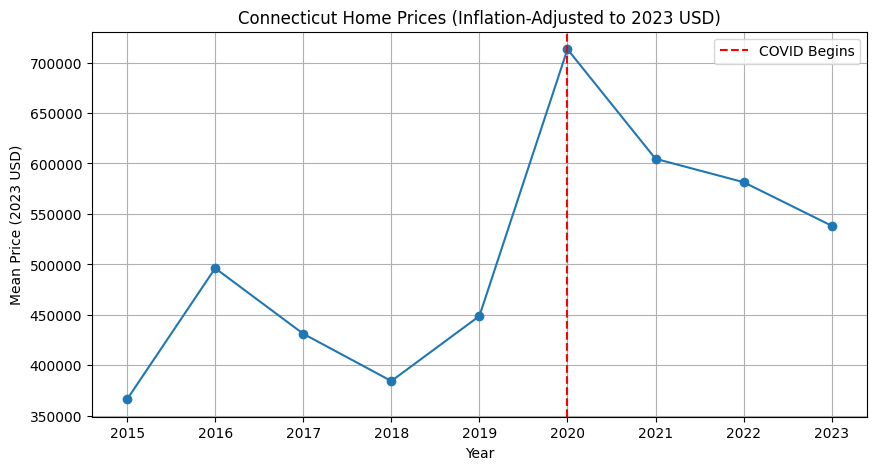

In [27]:
#Home prices Graph with covid line
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(df["Year"], df["mean_residential_price_2023usd"], marker="o")
plt.axvline(2020, color="red", linestyle="--", label="COVID Begins")
plt.title("Connecticut Home Prices (Inflation-Adjusted to 2023 USD)")
plt.ylabel("Mean Price (2023 USD)")
plt.xlabel("Year")
plt.legend()
plt.grid()
plt.show()

Connecticut home prices experienced a substantial and sustained real increase during the COVID-19 years. This supports the idea that the pandemic fundamentally reshaped the housing market, with demand surges and limited inventory driving prices well above pre-pandemic levels. Affordability pressures likely intensified as price growth outpaced typical income gains.


## Research Question 2: How did real median household income change?

In [28]:
# Split into pre-pandemic (2015–2019) and COVID-era (2020–2023)
# Calculate means and percent changes

df = final_year_df.copy()

pre = df[(df["Year"] >= 2015) & (df["Year"] <= 2019)]
during = df[(df["Year"] >= 2020) & (df["Year"] <= 2023)]

pre_income = pre["median_household_income"].mean()
during_income = during["median_household_income"].mean()

income_pct_change = ((during_income - pre_income) / pre_income) * 100

print("Pre-pandemic mean median household income (2015–2019):", pre_income)
print("COVID-period mean median household income (2020–2023):", during_income)
print("Percent change:", income_pct_change, "%")

Pre-pandemic mean median household income (2015–2019): 77168.0
COVID-period mean median household income (2020–2023): 81260.0
Percent change: 5.3027161517727555 %


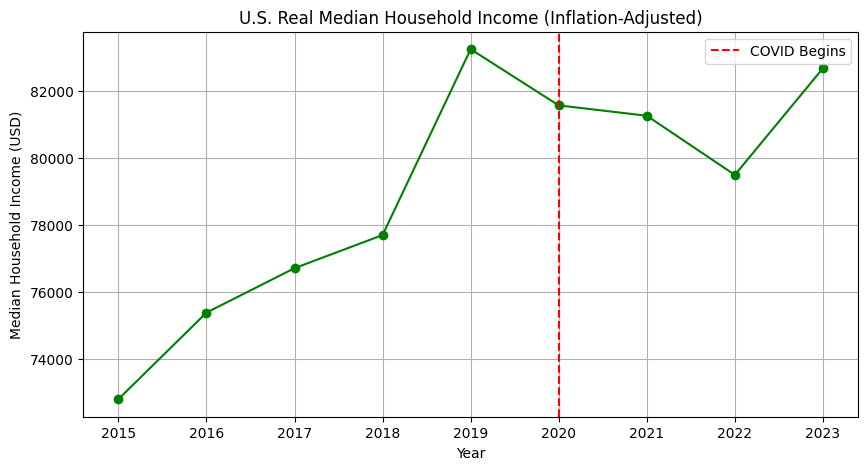

In [29]:
#Income Graph with covid line


plt.figure(figsize=(10,5))
plt.plot(df["Year"], df["median_household_income"], marker="o", color="green")
plt.axvline(2020, color="red", linestyle="--", label="COVID Begins")
plt.title("U.S. Real Median Household Income (Inflation-Adjusted)")
plt.xlabel("Year")
plt.ylabel("Median Household Income (USD)")
plt.grid()
plt.legend()
plt.show()

Unlike home prices, which surged rapidly during the pandemic, real median household income showed only a small positive change across the COVID period. In fact:

Income peaked just before the pandemic (2019)

Declined in 2020–2022 due to labor market disruptions

Rebounded in 2023, but still grew only modestly overall

This suggests that while the housing market experienced extreme upward pressure, household earnings did not grow proportionally. The gap between housing costs and income likely intensified affordability challenges for many families during and after the pandemic.

## Research Question 3: What relationship exists between changes in income and changes in home prices during and after the pandemic?

In [30]:
# Correlation between household income and inflation-adjusted home prices
corr = df["median_household_income"].corr(df["mean_residential_price_2023usd"])
print("Correlation:", corr)

Correlation: 0.5871509255866934


According to correlation, income influences housing prices, but income alone cannot explain dramatic price shifts, especially the pandemic spike in 2020.

In [31]:
#Linear Regression: Income vs. Housing Price

X = df["median_household_income"].values.reshape(-1, 1)
y = df["mean_residential_price_2023usd"].values.reshape(-1, 1)

model = LinearRegression()
model.fit(X, y)

slope = model.coef_[0][0]
intercept = model.intercept_[0]
r2 = model.score(X, y)

print("Regression Equation: price = {:.2f} * income + {:.2f}".format(slope, intercept))
print("R-squared:", r2)

Regression Equation: price = 18.58 * income + -960292.71
R-squared: 0.34474620941731093


Reinforces our thoughts with correlation.

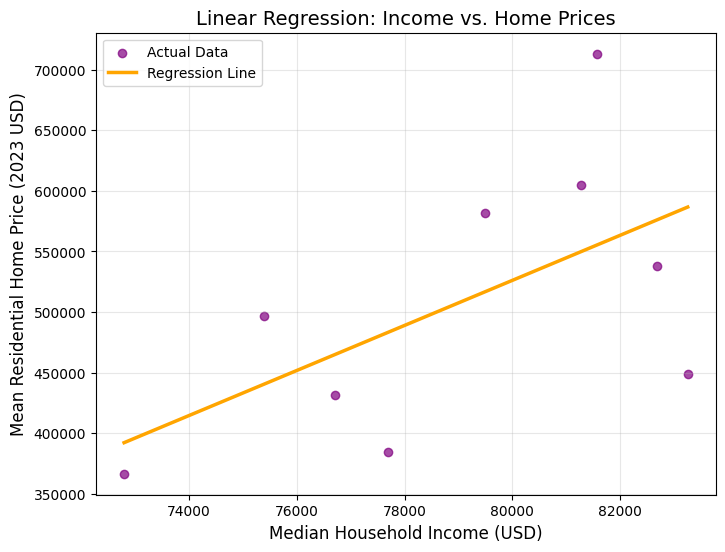

In [32]:
#Regression Model of income vs housing prices
#Generates prediction line, and each dot on the graph represents a year 
#Use mean because that is the data we want to explain
#Use median because of its earning

x_range = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
y_pred = model.predict(x_range)

plt.figure(figsize=(8,6))
plt.scatter(X, y, color="purple", label="Actual Data", alpha=0.7)
plt.plot(x_range, y_pred, color="orange", linewidth=2.5, label="Regression Line")

plt.title("Linear Regression: Income vs. Home Prices", fontsize=14)
plt.xlabel("Median Household Income (USD)", fontsize=12)
plt.ylabel("Mean Residential Home Price (2023 USD)", fontsize=12)

plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

In [33]:
#Slope = 18.579314981810274
#For every $1 increase in median household income, the mean residential price increases by ~$18.58


While income and home prices have a moderate long-term positive relationship, income does not account for the dramatic surge in housing prices during COVID-19.
The pandemic housing market was influenced primarily by non-income factors, leading to a widening affordability gap.

This disconnect reinforces the idea that rising home prices during COVID-19 did not reflect improved household economic conditions—but instead structural shifts in housing demand and supply.

## Research Question 4: What broader conclusions can we draw about post-pandemic affordability and economic resilience?

The combined trends in housing prices and household income reveal that the post-pandemic economy experienced a significant imbalance between property values and earnings. While home prices rose sharply during the COVID-19 period—far outpacing inflation—median household income grew only modestly. This widening gap indicates that housing affordability declined substantially, suggesting that rising property values did not reflect genuine improvements in household financial strength. Instead, the rapid escalation in home prices points to structural pressures in the housing market rather than broad-based economic recovery.

Overall, the evidence suggests that the post-pandemic period was characterized by increased economic inequality and a decline in affordability, as income growth failed to keep pace with the surging cost of homeownership. These findings highlight vulnerabilities in economic resilience, especially for households attempting to enter or remain in the housing market after the pandemic.